## Dette er en mal på hvordan laste inn dataset fra temperaturloggerne brukt i 2023

In [9]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
from datetime import datetime

In [54]:
# !!! Endre dette til der du har din fil på din PC !!!
sti='C:/Users/vdu001/Downloads'
fil='/testing excel ark - fritt fram testing csv.csv'

In [55]:
# Vi kommer tilbake til hvordan denne funksjonen funker
# Ta evt en titt på oppgave 4 og 5 for mer info
df=pd.read_csv(
    sti+fil, index_col=0, delimiter=';', 
    skiprows=26, engine='python', decimal=","
)

In [56]:
df

,Time,TemperatureÂ°C,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
No.,,,,,,
1,2023-02-05 10:00:01,1.6,NaN,NaN,NaN,NaN
2,2023-02-05 10:05:01,1.6,NaN,NaN,NaN,NaN
3,2023-02-05 10:10:01,1.6,NaN,Testing av regning,NaN,NaN
4,2023-02-05 10:15:01,1.7,NaN,Gjennomsnittstemperatur,4.92,NaN
5,2023-02-05 10:20:01,1.7,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2260,2023-02-13 06:15:01,5.9,NaN,NaN,NaN,NaN
2261,2023-02-13 06:20:01,11.6,NaN,NaN,NaN,NaN
2262,2023-02-13 06:25:01,15.0,NaN,NaN,NaN,NaN


In [57]:
# Lagre den første kolonnen som "tid"
tid=df.iloc[:,0]
tid

No.
1       2023-02-05 10:00:01
2       2023-02-05 10:05:01
3       2023-02-05 10:10:01
4       2023-02-05 10:15:01
5       2023-02-05 10:20:01
               ...         
2260    2023-02-13 06:15:01
2261    2023-02-13 06:20:01
2262    2023-02-13 06:25:01
2263    2023-02-13 06:30:01
2264    2023-02-13 06:35:01
Name: Time, Length: 2264, dtype: object

In [41]:
# Konverter informasjonen i vektoren "tid" til et format som python 
# greier å tolke som en dato
tid=[datetime.strptime(tid[i], '%Y-%m-%d %H:%M:%S') for i in range(1,len(tid)+1)]

In [42]:
# Lagre den andre kolonnen som "temp"
temp=df.iloc[:,1]
temp

No.
1        1.6
2        1.6
3        1.6
4        1.7
5        1.7
        ... 
2260     5.9
2261    11.6
2262    15.0
2263    18.1
2264    21.3
Name: TemperatureÂ°C, Length: 2264, dtype: float64

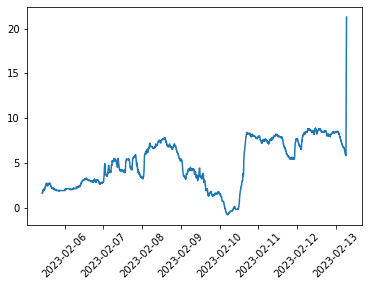

In [43]:
# Lage en figur for å ta en titt på dataene
plt.plot(tid, temp)
plt.xticks(rotation = 45)
plt.show()

#### Eksempel med en fil på et litt annet format

In [2]:
sti=r'W:\Work\Documents\EkteData\ikkeGit\div_Data'
fil=r'\Temperaturmåling2.txt'

In [3]:
df=pd.read_csv(
    sti+fil, delimiter=',', 
    engine='python', parse_dates=['Dato'], dayfirst=True
)

In [4]:
df

,Dato,temp,desimal
0,2023-02-01 00:08:40,2,4.0
1,2023-02-01 00:18:40,2,2.0
2,2023-02-01 00:28:40,2,1.0
3,2023-02-01 00:38:40,2,2.0
4,2023-02-01 00:48:40,2,3.0
...,...,...,...
2155,2023-02-15 23:18:40,4,4.0
2156,2023-02-15 23:28:40,4,4.0
2157,2023-02-15 23:38:40,4,4.0
2158,2023-02-15 23:48:40,4,5.0


In [5]:
# Lagre den første kolonnen som "tid"
tid=df.iloc[:,0]
tid

0      2023-02-01 00:08:40
1      2023-02-01 00:18:40
2      2023-02-01 00:28:40
3      2023-02-01 00:38:40
4      2023-02-01 00:48:40
               ...        
2155   2023-02-15 23:18:40
2156   2023-02-15 23:28:40
2157   2023-02-15 23:38:40
2158   2023-02-15 23:48:40
2159   2023-02-15 23:58:40
Name: Dato, Length: 2160, dtype: datetime64[ns]

In [6]:
# Lagre den andre kolonnen som "temp"
temp=df.iloc[:,1]
temp

0       2
1       2
2       2
3       2
4       2
       ..
2155    4
2156    4
2157    4
2158    4
2159    4
Name:  temp, Length: 2160, dtype: int64

In [11]:
desimal=np.copy(df.iloc[:,2])
desimal

array([4., 2., 1., ..., 4., 5., 5.])

In [12]:
# Der det ikke er noen desimaler blir dette NaN. Sett dette til 0 istedet 
# slik at "temp" ikke ender opp som NaN der det ikke er desimaler. 
desimal[np.isnan(desimal)]=0

In [13]:
temp=temp+0.1*desimal
temp

0       2.4
1       2.2
2       2.1
3       2.2
4       2.3
       ... 
2155    4.4
2156    4.4
2157    4.4
2158    4.5
2159    4.5
Name:  temp, Length: 2160, dtype: float64

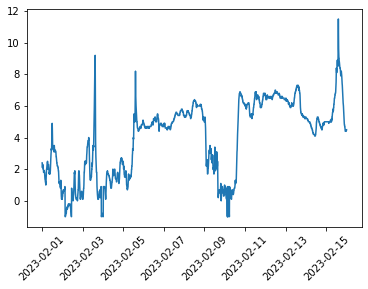

In [14]:
# Lage en figur for å ta en titt på dataene
plt.plot(tid, temp)
plt.xticks(rotation = 45)
plt.show()